# Visualizing Pixar's Movies
This project aims to analyze some hit movies produced by Pixar between 2005 and 2015 to get more information about some of the most popular animation by kids around the world.

## Loading necessary libraries and data

In [0]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Load file from Github
url = "https://raw.githubusercontent.com/lamtran1309/side-projects/master/Visualizing%20Pixar's%20Movie/PixarMovies.csv"
movies = pd.read_csv(url, encoding ="Latin-1")
movies.dropna()

,Year Released,Movie,Length,RT Score,IMDB Score,Metacritic Score,Opening Weekend,Worldwide Gross,Domestic Gross,Adjusted Domestic Gross,International Gross,Domestic %,International %,Production Budget,Oscars Nominated,Oscars Won
0,1995,Toy Story,81,100,8.3,92,29.14,362.0,191.8,356.21,170.2,52.98%,47.02%,30,3.0,0.0
1,1998,A Bug's Life,96,92,7.2,77,33.26,363.4,162.8,277.18,200.6,44.80%,55.20%,45,1.0,0.0
2,1999,Toy Story 2,92,100,7.9,88,57.39,485.0,245.9,388.43,239.2,50.70%,49.32%,90,1.0,0.0
3,2001,"Monsters, Inc.",90,96,8.1,78,62.58,528.8,255.9,366.12,272.9,48.39%,51.61%,115,3.0,1.0
4,2003,Finding Nemo,104,99,8.2,90,70.25,895.6,339.7,457.46,555.9,37.93%,62.07%,94,4.0,1.0
5,2004,The Incredibles,115,97,8.0,90,70.47,631.4,261.4,341.28,370.0,41.40%,58.60%,92,4.0,2.0
6,2006,Cars,116,74,7.2,73,60.12,462.0,244.1,302.59,217.9,52.84%,47.16%,70,2.0,0.0
7,2007,Ratatouille,111,96,8.0,96,47.00,623.7,206.4,243.65,417.3,33.09%,66.91%,150,5.0,1.0
8,2008,WALL-E,97,96,8.4,94,63.10,521.3,223.8,253.11,297.5,42.93%,57.07%,180,6.0,1.0
9,2009,Up,96,98,8.3,88,68.11,731.3,293.0,318.90,438.3,40.07%,59.93%,175,5.0,2.0


Data dictionary is listed below with explanation:
* **Year Released** — the year the movie was released. 
* **Movie** — the name of the movie. 
* **RT Score** — the Rotten Tomatoes rating for the movie. 
* **IMDB Score** — the IMDB rating for the movie. 
* **Metacritic SCore** — the Metacritic rating for the movie. 
* **Opening Weekend** — the amount of revenue the movie made on opening weekend (in millions of dollars). 
* **Worldwide Gross** — the total amount of revenue the movie has made to date. 
* **Production Budget** — the amount of money spent to produce the film (in millions of dollars). 
* **Oscars bold text Won** — the number of Oscar awards the movie won. 

In [3]:
movies.describe()

,Year Released,Length,RT Score,IMDB Score,Metacritic Score,Opening Weekend,Worldwide Gross,Domestic Gross,Adjusted Domestic Gross,International Gross,Production Budget,Oscars Nominated,Oscars Won
count,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,14.000000,14.000000
mean,2006.066667,101.533333,89.333333,7.846667,82.800000,67.990667,612.486667,258.506667,318.448000,353.986667,133.400000,2.857143,0.785714
std,5.933761,9.927355,16.451950,0.655599,12.119642,23.270468,190.193934,66.518284,73.321064,135.061615,59.696614,2.032700,0.801784
min,1995.000000,81.000000,39.000000,6.300000,57.000000,29.140000,362.000000,162.800000,194.430000,170.200000,30.000000,0.000000,0.000000
25%,2002.000000,96.000000,85.000000,7.300000,75.000000,58.755000,503.150000,215.100000,261.350000,256.050000,91.000000,1.000000,0.000000
50%,2007.000000,102.000000,96.000000,8.000000,88.000000,66.300000,559.900000,245.900000,318.900000,336.600000,150.000000,3.000000,1.000000
75%,2010.500000,109.000000,98.500000,8.300000,92.000000,76.450000,704.200000,280.750000,361.165000,427.800000,182.500000,4.750000,1.000000
max,2015.000000,116.000000,100.000000,8.800000,96.000000,110.310000,1063.200000,415.000000,457.460000,648.200000,200.000000,6.000000,2.000000


##Data Cleaning

As can be seen from the table above, the data from the columns `International %` and `Domestic %` are written in the form of string. Therefore, it should be converted to float for further calculation. 

In [4]:
# Convert International % column
movies["International %"] = movies["International %"].str.replace("%", "")
movies["International %"] = movies["International %"].astype(float)

# Convert Domestic % column
movies["Domestic %"] = movies["Domestic %"].str.replace("%", "")
movies["Domestic %"] = movies["Domestic %"].astype(float)

movies[["Domestic %", "International %"]] 

,Domestic %,International %
0,52.98,47.02
1,44.80,55.20
2,50.70,49.32
3,48.39,51.61
4,37.93,62.07
5,41.40,58.60
6,52.84,47.16
7,33.09,66.91
8,42.93,57.07
9,40.07,59.93


As original, IMDB score is on the scale of 10, it would be better to conver in to 100 point scale by multiplying with 10.

In [5]:
movies["IMDB Score"] = movies["IMDB Score"] * 10
movies["IMDB Score"]

0     83.0
1     72.0
2     79.0
3     81.0
4     82.0
5     80.0
6     72.0
7     80.0
8     84.0
9     83.0
10    84.0
11    63.0
12    72.0
13    74.0
14    88.0
Name: IMDB Score, dtype: float64

In the next section where data plot is presented for each movie. Therefore, it is suggested to use `Movie` as index value

##Data Visualization

### Pixar movies rating
As each movie from Pixar are evaluated by 3 major review websites (on the scale of 100), the following graph represent the variation between those:

Text(0, 0.5, 'Reviews')

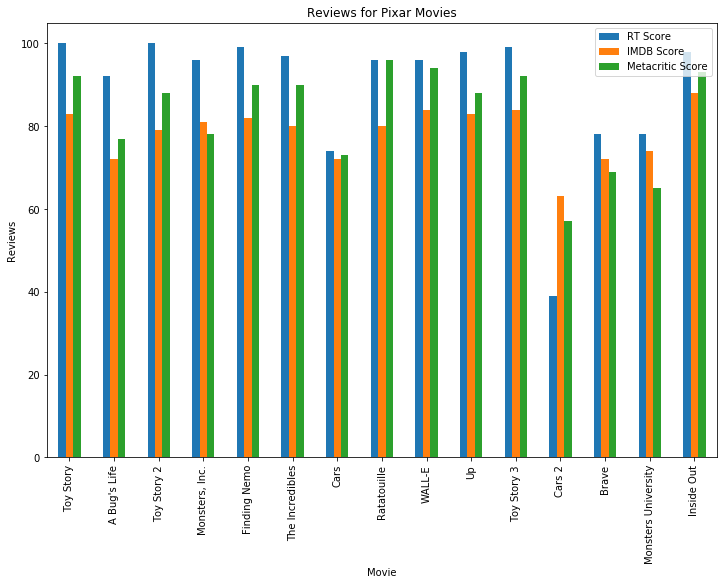

In [6]:
movies.plot.bar(x="Movie", y=["RT Score", "IMDB Score", "Metacritic Score"], figsize=(12,8))
plt.title("Reviews for Pixar Movies")
plt.xlabel("Movie")
plt.ylabel("Reviews")

Overall, most Pixar movies receive relatively high score from 3 review sites with average points of above 70, except Cars 2. Specifically, Rotten Tomatoes rate higher ratings for Pixar movies then the other two.

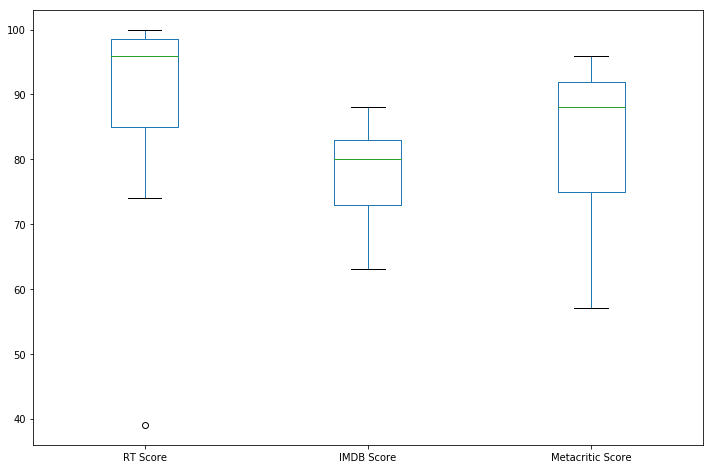

In [7]:
movies[["RT Score", "IMDB Score", "Metacritic Score"]].plot(kind="box", figsize=(12,8))

The box plot reinforce the judgment above that Rotten Tomatoes rates Pixar movies higher than the other two reviewers. In addition, the rating from Metacritic Score has wide variation, rangin from 60 to below 100.

###Pixar Movies Revenue

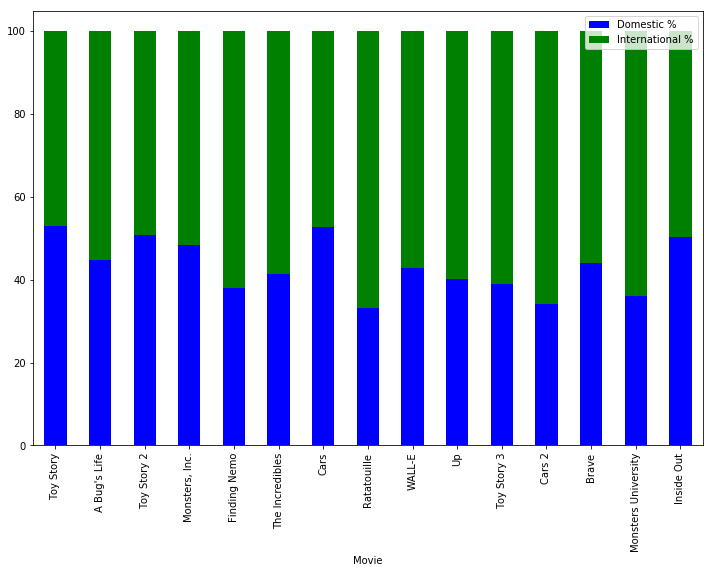

In [8]:
movies.plot.bar(x = "Movie", y = ["Domestic %", "International %"], stacked=True, figsize=(12,8), color=["blue", "green"])

Most of the Pixar movies get higher revenue from international market than in US land. There is a decrease trend in proportion of revenue generated domestically since Toy Story in 1995

###Oscars Nominations/Won

Text(0, 0.5, 'Oscars')

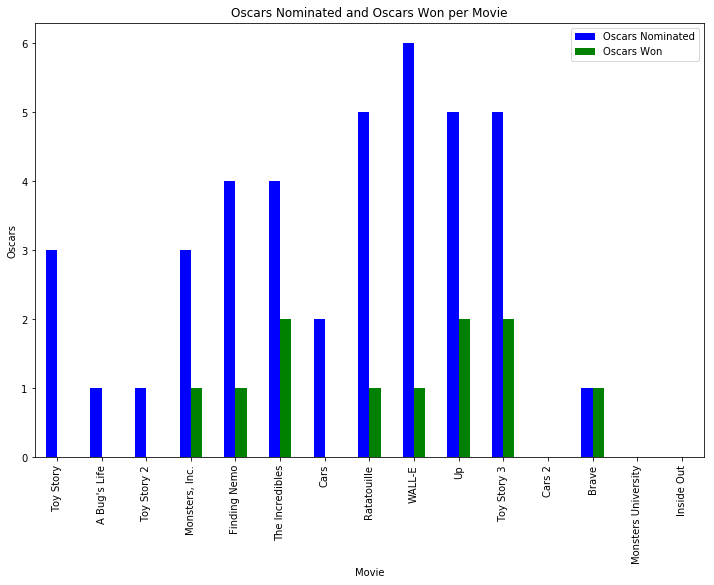

In [9]:
movies.plot.bar(x="Movie", y=["Oscars Nominated", "Oscars Won"], figsize=(12,8), color=["blue", "green"])
plt.title("Oscars Nominated and Oscars Won per Movie")
plt.xlabel("Movie")
plt.ylabel("Oscars")

There are three movies from Pixar, "Cars 2", "Inside Out" and "Monsters University" did not receive any Oscar Nominations or Awards; especially the last one which had one of the biggest International Revenue. While Wall-E has highest number of nominations (6), but only got 1 Oscars win.